# Modeling Case 3 : Basic + Date + Column2 + Illegal

- 총 24개 칼럼 (LABEL 제외)

- 기본 파생변수 19개
    - 최근 6개월간 해당 업체별 수입건수, 수입금액, 검사건수, 적발건수, 적발율
        - R6M_CON_IMP_CNT
        - R6M_CON_IMP_AMT
        - R6M_CON_NUMB_OF_INSPECTION
        - R6M_CON_NUMB_OF_DETECTED
        - R6M_CON_RATIO_OF_DETECTED
    - 최근 6개월간 해당 HS CODE별 수입건수, 수입금액, 검사건수, 적발건수
        - R6M_CODE_IMP_CNT
        - R6M_CODE_IMP_AMT
        - R6M_CODE_NUMB_OF_INSPECTION
        - R6M_CODE_NUMB_OF_DETECTED
    - 최근 6개월간 해당 원산지별 수입건수, 수입금액, 검사건수, 적발건수, 적발율
        - R6M_COUNTRY_IMP_CNT
        - R6M_COUNTRY_IMP_AMT
        - R6M_COUNTRY_NUMB_OF_INSPECTION
        - R6M_COUNTRY_NUMB_OF_DETECTED
        - R6M_COUNTRY_RATIO_OF_DETECTED
    - 최근 6개월간 해당 관세사별 수입건수, 수입금액, 검사건수, 적발건수, 적발율
        - R6M_REP_IMP_CNT
        - R6M_REP_IMP_AMT
        - R6M_REP_NUMB_OF_INSPECTION
        - R6M_REP_NUMB_OF_DETECTED
        - R6M_REP_RATIO_OF_DETECTED    

- 날짜 관련 파생변수 2개
    - A_HOUR
    - C_MONTH

- Feature Importance 기반 기존 칼럼 2개
    - CUS_TOTAL_NUMBER_OF_PACKAGES_6
    - IMP_EXCHANGE_RATE_23

- EDA 기반 파생변수 1개
    - CON_ILLEGAL_RATIO

- Modeling 모듈의 Algorithm 클래스를 사용하여 진행

In [1]:
def syspath(path) :
  if path not in sys.path :
    sys.path.append(path)
  else : pass

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

syspath('./dataset/mod')
warnings.filterwarnings('ignore')

In [3]:
from Preprocessing import Encoder
from Modeling import Algorithm

In [4]:
df = pd.read_pickle('./dataset/43_Basic_Date_Column2_Illegal.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146508 entries, 0 to 2146507
Data columns (total 25 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   R6M_CON_IMP_CNT                 int64  
 1   R6M_CON_IMP_AMT                 float64
 2   R6M_CON_NUMB_OF_INSPECTION      int64  
 3   R6M_CON_NUMB_OF_DETECTED        int64  
 4   R6M_CON_RATIO_OF_DETECTED       float64
 5   R6M_CODE_IMP_CNT                int64  
 6   R6M_CODE_IMP_AMT                float64
 7   R6M_CODE_NUMB_OF_INSPECTION     int64  
 8   R6M_CODE_NUMB_OF_DETECTED       int64  
 9   R6M_COUNTRY_IMP_CNT             int64  
 10  R6M_COUNTRY_IMP_AMT             float64
 11  R6M_COUNTRY_NUMB_OF_INSPECTION  int64  
 12  R6M_COUNTRY_NUMB_OF_DETECTED    int64  
 13  R6M_COUNTRY_RATIO_OF_DETECTED   float64
 14  R6M_REP_IMP_CNT                 int64  
 15  R6M_REP_IMP_AMT                 float64
 16  R6M_REP_NUMB_OF_INSPECTION      int64  
 17  R6M_REP_NUMB_OF_DETECTED   

## LightGBM : Label Encoding

[1]	valid_0's binary_logloss: 0.59964
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.523066
[3]	valid_0's binary_logloss: 0.459192
[4]	valid_0's binary_logloss: 0.40517
[5]	valid_0's binary_logloss: 0.359039
[6]	valid_0's binary_logloss: 0.31935
[7]	valid_0's binary_logloss: 0.284882
[8]	valid_0's binary_logloss: 0.254828
[9]	valid_0's binary_logloss: 0.228466
[10]	valid_0's binary_logloss: 0.205347
[11]	valid_0's binary_logloss: 0.18488
[12]	valid_0's binary_logloss: 0.166794
[13]	valid_0's binary_logloss: 0.150714
[14]	valid_0's binary_logloss: 0.136374
[15]	valid_0's binary_logloss: 0.12359
[16]	valid_0's binary_logloss: 0.112238
[17]	valid_0's binary_logloss: 0.101996
[18]	valid_0's binary_logloss: 0.0928746
[19]	valid_0's binary_logloss: 0.0847091
[20]	valid_0's binary_logloss: 0.0773857
[21]	valid_0's binary_logloss: 0.0707702
[22]	valid_0's binary_logloss: 0.0647884
[23]	valid_0's binary_logloss: 0.0592904
[24]	valid_0's binary_loglo

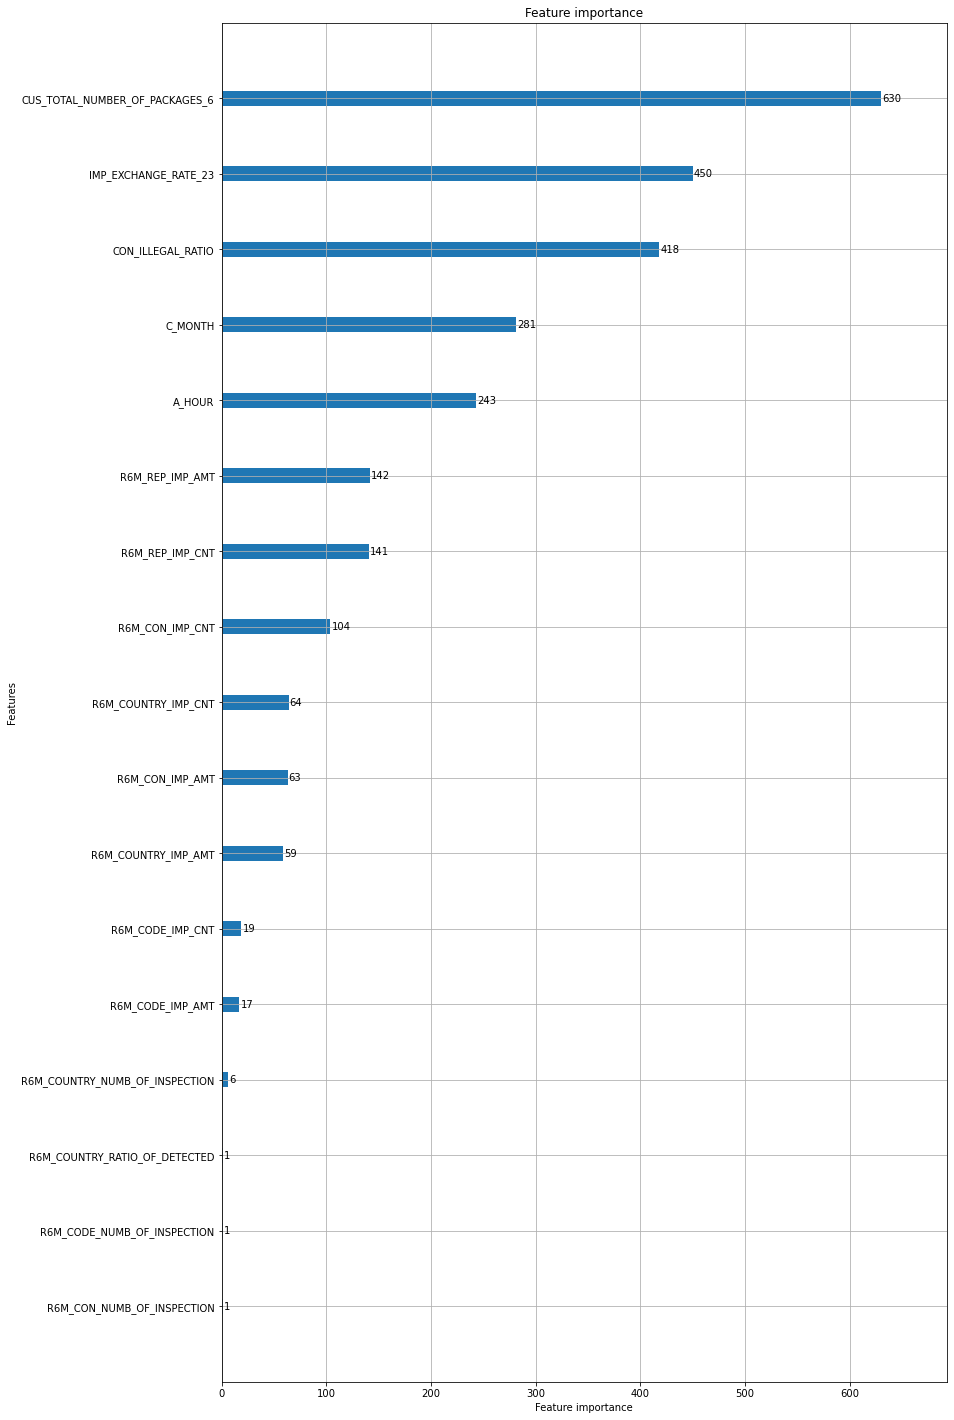

In [5]:
en = Encoder(df)
le_df = en.label()
al_l = Algorithm(le_df)
al_l.LGBM()

## LightGBM : One-hot Encoding

- Label Encoding과 One-hot Encoding 결과가 거의 차이 나지 않으므로 이후 알고리즘은 One-hot Encoding을 기반으로 진행

[1]	valid_0's binary_logloss: 0.599646
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.523044
[3]	valid_0's binary_logloss: 0.459188
[4]	valid_0's binary_logloss: 0.405181
[5]	valid_0's binary_logloss: 0.359026
[6]	valid_0's binary_logloss: 0.319261
[7]	valid_0's binary_logloss: 0.284765
[8]	valid_0's binary_logloss: 0.254698
[9]	valid_0's binary_logloss: 0.228399
[10]	valid_0's binary_logloss: 0.205187
[11]	valid_0's binary_logloss: 0.184721
[12]	valid_0's binary_logloss: 0.166571
[13]	valid_0's binary_logloss: 0.150478
[14]	valid_0's binary_logloss: 0.136147
[15]	valid_0's binary_logloss: 0.123391
[16]	valid_0's binary_logloss: 0.111977
[17]	valid_0's binary_logloss: 0.101832
[18]	valid_0's binary_logloss: 0.0926175
[19]	valid_0's binary_logloss: 0.0844091
[20]	valid_0's binary_logloss: 0.0769947
[21]	valid_0's binary_logloss: 0.0703992
[22]	valid_0's binary_logloss: 0.064415
[23]	valid_0's binary_logloss: 0.0590254
[24]	valid_0's binary_l

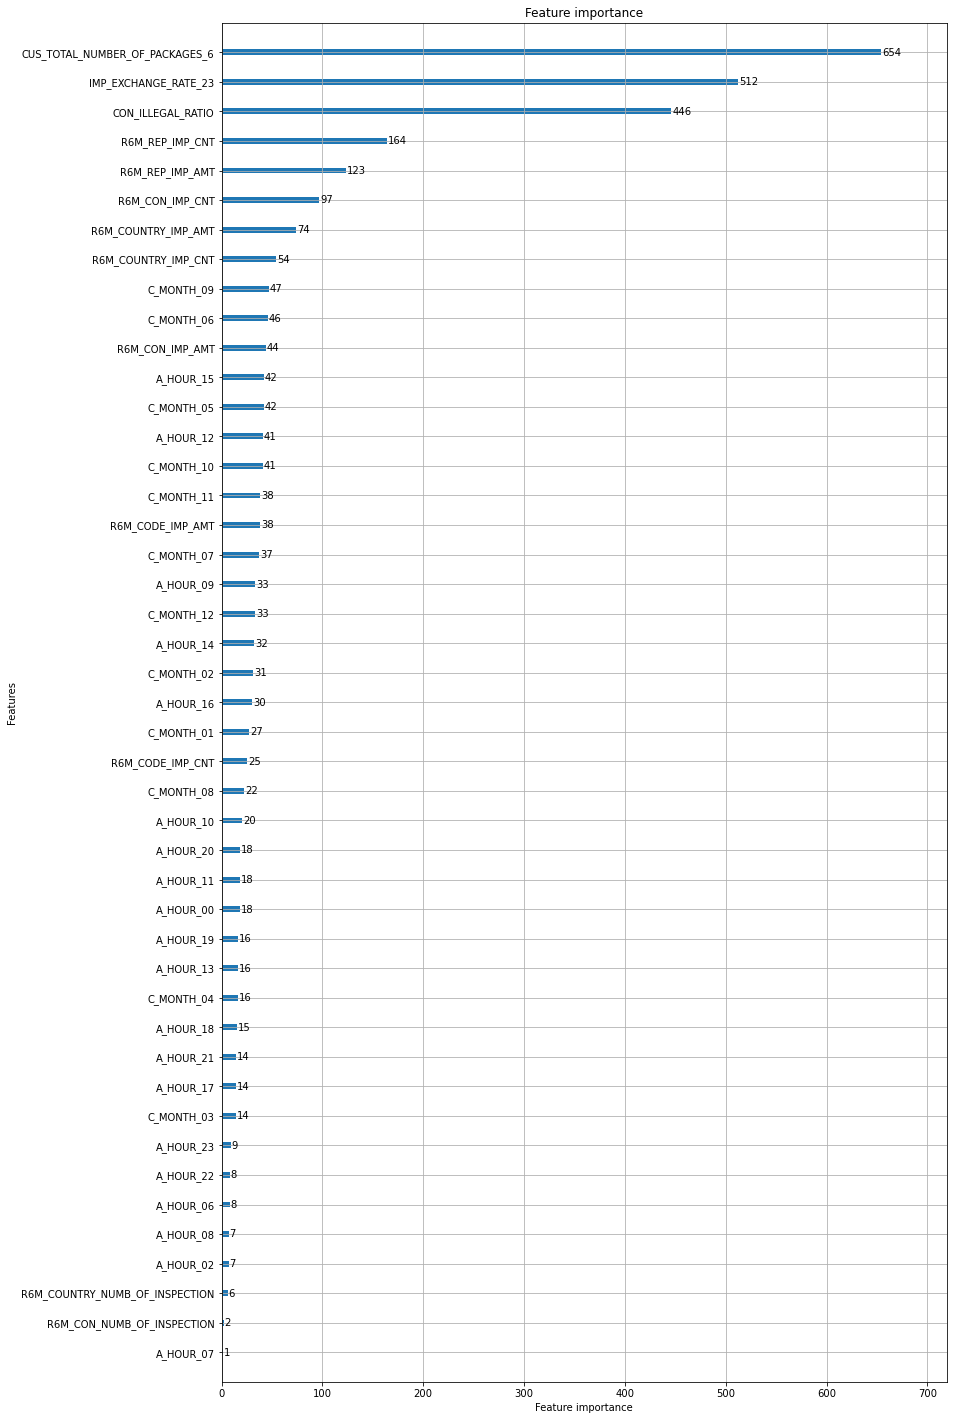

In [6]:
oh_df = en.one_hot()
al_o = Algorithm(oh_df)
al_o.LGBM()

## CatBoost

Learning rate set to 0.5
0:	learn: 0.0562003	total: 788ms	remaining: 1m 18s
1:	learn: 0.0256556	total: 1.51s	remaining: 1m 14s
2:	learn: 0.0201635	total: 2.18s	remaining: 1m 10s
3:	learn: 0.0191275	total: 2.91s	remaining: 1m 9s
4:	learn: 0.0183605	total: 3.72s	remaining: 1m 10s
5:	learn: 0.0165050	total: 4.38s	remaining: 1m 8s
6:	learn: 0.0160651	total: 5s	remaining: 1m 6s
7:	learn: 0.0155497	total: 5.64s	remaining: 1m 4s
8:	learn: 0.0149752	total: 6.29s	remaining: 1m 3s
9:	learn: 0.0144377	total: 6.95s	remaining: 1m 2s
10:	learn: 0.0140390	total: 7.76s	remaining: 1m 2s
11:	learn: 0.0135764	total: 8.5s	remaining: 1m 2s
12:	learn: 0.0132377	total: 9.11s	remaining: 1m
13:	learn: 0.0128870	total: 9.7s	remaining: 59.6s
14:	learn: 0.0126568	total: 10.3s	remaining: 58.4s
15:	learn: 0.0122409	total: 11s	remaining: 57.8s
16:	learn: 0.0119305	total: 11.8s	remaining: 57.5s
17:	learn: 0.0116918	total: 12.5s	remaining: 57s
18:	learn: 0.0112741	total: 13.3s	remaining: 56.6s
19:	learn: 0.0110762	tot

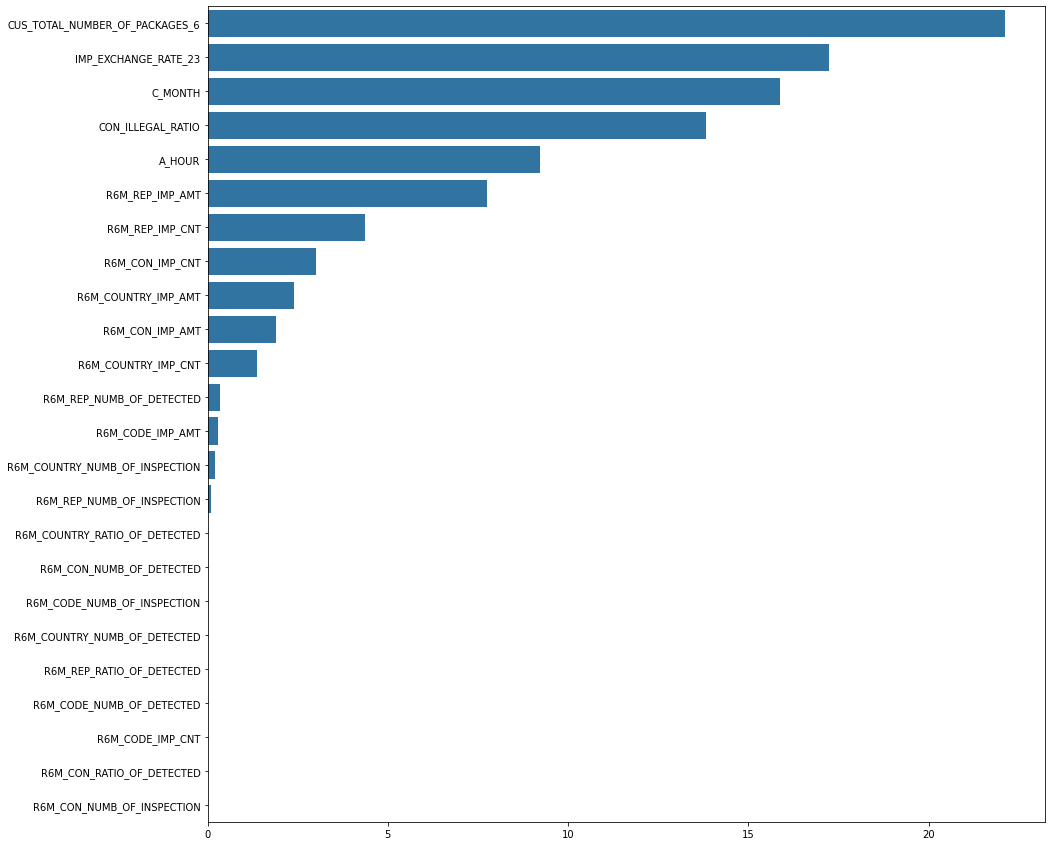

In [7]:
al_o.catboost()

## MLP

In [8]:
al_o.MLP()

Confusion Matrix
[[426241    269]
 [  1134   1658]]
Accuracy : 0.9967
Precision : 0.8604
Recall : 0.5938
f1 score : 0.7027
time : 1566.649044934


## Random Forest

Confusion Matrix
[[426508      2]
 [     9   2783]]
Accuracy : 1.0000
Precision : 0.9993
Recall : 0.9968
f1 score : 0.9980
time : 294.7378669110003


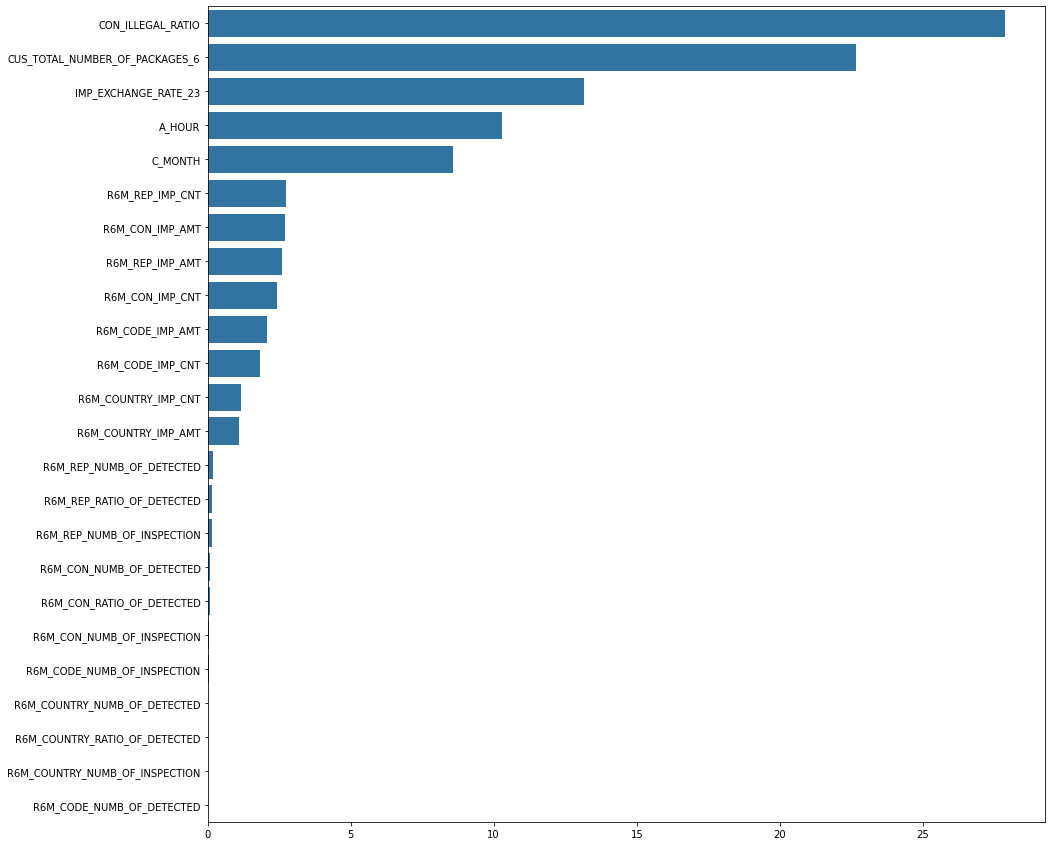

In [9]:
al_o.RF()